# 使用指南
本教程将介绍一些基本的使用模式和最佳实践，以帮助您开始使用Matplotlib。

## 一般概念
matplotlib有一个广泛的代码库，可以让许多新用户望而生畏。然而，大多数matplotlib可以通过一个相当简单的概念框架和一些重要的知识来理解。

绘图需要在一系列层次上进行操作，从最一般的层面（例如，'轮廓这个2-D数组'）到最具体的层面（例如，'将此屏幕像素变为红色'）。绘图软件包的目的是通过所有必要的控制 - 即通过大多数时间使用相对较高级别的命令，帮助您尽可能轻松地对可视化数据进行可视化处理，并且当需要时,仍然能够使用低级别的命令。

因此，matplotlib中的所有内容都按照层次结构进行组织。层次结构的顶部是由matplotlib.pyplot模块提供的matplotlib“状态机环境”（“state-machine environment”） 。在这个级别上，简单的功能用于在当前图中向当前轴添加绘图元素（线条，图像，文本等）。

> Pyplot的状态机环境的行为与MATLAB类似，对于有MATLAB经验的用户应该是最熟悉的。

层次结构中的下一级是面向对象接口的第一级，其中pyplot仅用于一些功能（如图形创建），并且用户明确创建并跟踪图形和轴对象。在这个级别上，用户使用pyplot创建图形，并通过这些图形创建一个或多个轴对象。这些轴对象然后用于大多数绘图操作。

为了实现更多控制 - 这对于将matplotlib图嵌入到GUI应用程序中是非常重要的 - pyplot级别可能会完全丢弃，从而留下纯粹面向对象的方法。

In [2]:
# sphinx_gallery_thumbnail_number = 3
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

## 图的组成

![image][PartsofaFigure]


[PartsofaFigure]: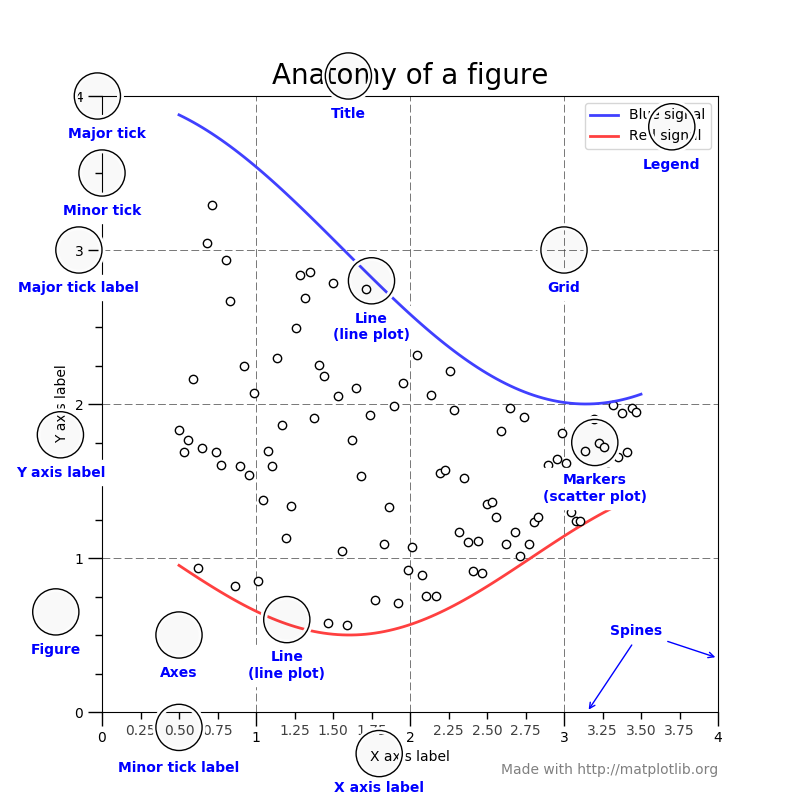

### Figure

整个 Figure。这个 Figure 跟踪所有的 Axes，一小群'特殊'artists（标题，图注等）和 canvas。（不要过分担心 canvas，它是至关重要的，因为它实际上是绘画的对象，让你看到你所画的东西，但作为用户，它或多或少不可见）。一个 Figure 可以有任意数量 Axes，但至少应该有一个。

创建新 Figure 的最简单方法是使用pyplot：

<Figure size 432x288 with 0 Axes>

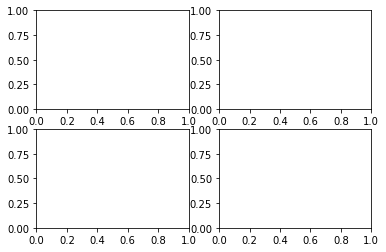

In [3]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Axes

这就是你认为的“情节”，它是具有数据空间的图像区域。给定的 Figure 可以包含许多 Axes ，但给定的Axes 对象只能在一个中Figure。Axes包含两个（或3D 下的三个） Axis对象（注意Axes和Axis之间的差异），它们负责处理数据限制（数据限制也可以通过set_xlim()和 set_ylim() Axes方法设置来进行控制 ）。每个  Axis 都有一个标题（通过  set_title() 设置 ），一个x标签（通过 set_xlabel() 设置 ）和一个y标签通过 set_ylabel()设置)）。

Axes类和它的成员函数是主要的切入点，以与OO接口工作

### Axis

这些是数字线状物体。 他们负责设置图形限制并生成 ticks（轴上的标记）和 ticklabels(ticks 的标记)。 ticks的位置由 Locator 对象确定，并且ticklabels 字符串由 Formatter 格式化。 正确的Locator 和 Formatter 的组合可以非常精确地控制刻度位置和标签。

### Artist

基本上你可以在 Figure 中看到的一切是一个 Artist（甚至 Figure，Axes和Axis对象）。这包括Text对象，Line2D对象， collection对象，Patch对象...（你明白了）。当图形被渲染时，所有 Artist 都被绘制到 canvas上。大多数 Artist 被绑在一个 Axes 上; 这样的Artist 不能被多个 Axes 共享，或者从一个移动到另一个。

## 绘制函数的输入类型

所有的绘图功能都需要np.array或np.ma.masked_array作为输入。类似数组的类，如pandas数据对象，np.matrix可能会或可能不会按预期工作。在绘图之前最好将这些转换为 np.array 对象。

例如，要转换一个 pandas.DataFrame
```python
a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asndarray = a.values
```
转换为 np.matrix
```python
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
```

## Matplotlib，pyplot和pylab：它们是如何相关的？

Matplotlib是整个包; matplotlib.pyplot 是 matplotlib 中的一个模块; 并且pylab是一个随同 matplotlib 安装的模块。

Pyplot为底层的面向对象的绘图库提供状态机界面。状态机隐式地自动创建 figures 和 axes 以实现所需的绘图。例如：

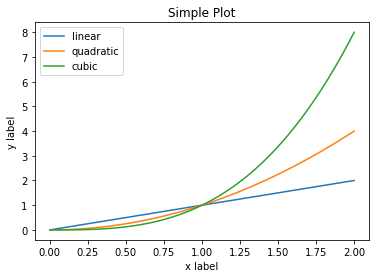

In [4]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

第一次调用plt.plot将自动创建必要的 figure 和 axes 以实现所需的绘图。随后的调用 plt.plot重新使用当前 axes，并且每次都添加另一条线。设置标题，图例和轴标签也会自动使用当前轴，并设置标题，创建图例和分别标注轴。

pylab是一个便利的模块，可以 在单个名称空间中批量导入 matplotlib.pyplot（用于绘图）和numpy（用于数学和使用数组）。虽然有很多例子使用pylab，但不再推荐。

对于非交互式绘图，建议使用pyplot创建图形，然后使用OO界面进行绘图。

## 编码风格

查看本文档和示例时，您会发现不同的编码风格和使用模式。这些风格完全有效，有其优点和缺点。几乎所有的例子都可以转换成另一种风格并获得相同的结果。唯一的警告是避免混合你自己代码的编码风格。

在不同的风格中，有两种是官方支持的。因此，这些是使用matplotlib的首选方式。

对于pyplot样式，脚本顶部的导入通常为：

In [5]:
import matplotlib.pyplot as plt
import numpy as np

然后可以调用例如np.arange，np.zeros，np.pi，plt.figure，plt.plot，plt.show等。使用pyplot接口创建图形，然后使用对象方法进行其他：

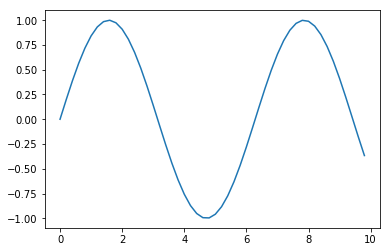

In [6]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
plt.show()

那么，为什么所有额外的输入，而不是MATLAB风格（依赖于全局状态和平面命名空间）呢？对于像这个例子这样的非常简单的事情，唯一的好处是学术上的：字体样式更明确，更清楚事物来自哪里以及发生了什么。对于更复杂的应用程序，这种明确性和清晰度变得越来越有价值，而更丰富和更完整的面向对象接口可能会使程序更容易编写和维护。

通常情况下，一个人会发现自己一遍又一遍地制作相同的绘图，但使用不同的数据集，这导致需要编写专门的功能来进行绘图。推荐的函数签名是这样的：

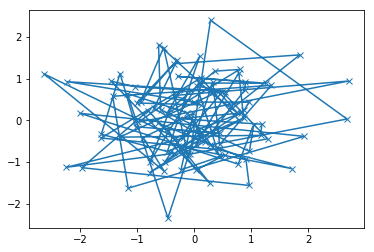

In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

或者如果你想有2个子图：

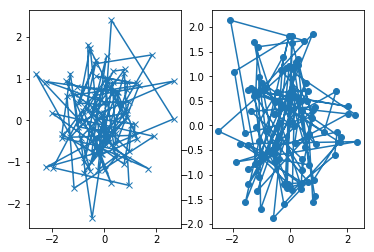

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

再次，对于这些简单的例子来说，这种风格看起来像是矫枉过正，但是一旦图形变得稍微复杂一点，它就会得到回报。